In [1]:
import pandas as pd
import numpy as np

### Import raw baseball stats and salaries data

In [3]:
batting_raw = pd.read_csv('Batting.csv')
pitching_raw = pd.read_csv('Pitching.csv')
salaries_raw = pd.read_csv('Salaries.csv')

In [4]:
batting_raw.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [5]:
pitching_raw.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [6]:
salaries_raw.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


### Perform joins between batting stats and salaries, pitching stats and salaries

In [8]:
df_batting = pd.merge(batting_raw, salaries_raw, on=['yearID', 'playerID'])
df_pitching = pd.merge(pitching_raw, salaries_raw, on=['yearID', 'playerID'])

In [9]:
df_batting.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary
0,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,TOR,AL,170000
1,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,CHA,AL,147500
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,22,26.0,5.0,6.0,4.0,3.0,7.0,PHI,NL,237000
3,alexado01,1985,1,TOR,AL,36,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,TOR,AL,875000
4,allenne01,1985,1,SLN,NL,23,2,0,0,0,...,0,2.0,0.0,0.0,0.0,0.0,0.0,SLN,NL,750000


In [10]:
df_pitching.head()

,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,teamID_y,lgID_y,salary
0,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,0,370.0,26,35,1.0,2.0,16.0,TOR,AL,170000
1,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,0,246.0,21,27,3.0,3.0,4.0,CHA,AL,147500
2,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,0,1090.0,0,105,6.0,3.0,15.0,TOR,AL,875000
3,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,1,135.0,13,22,1.0,3.0,3.0,SLN,NL,750000
4,allenne01,1985,2,NYA,AL,1,0,17,0,0,...,0,124.0,10,9,0.0,0.0,3.0,SLN,NL,750000


### Separate predictor (stats) and response (salary) variables

In [36]:
y_b = df_batting['salary']
y_p = df_pitching['salary']
y = y_b.append(y_p)

In [17]:
df_batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID_x', 'lgID_x', 'G', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'teamID_y', 'lgID_y', 'salary'],
      dtype='object')

In [28]:
df_pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID_x', 'lgID_x', 'W', 'L', 'G',
       'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP',
       'teamID_y', 'lgID_y', 'salary'],
      dtype='object')

In [32]:
X_b = df_batting[['G', 'AB', 'R','H', '2B', '3B', 'HR', 'RBI', 'SB', 
                  'CS', 'BB', 'SO', 'IBB', 'HBP','SH', 'SF', 'GIDP']]
X_p = df_pitching[['W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP']]

In [31]:
X_b.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,61,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,54,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,91,165,27,46,7,3,6,21.0,1.0,0.0,22,26.0,5.0,6.0,4.0,3.0,7.0
3,36,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,2,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_p.head()

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,7,2,61,0,0,0,10,259,86,31,...,1.0,2,3.0,0,370.0,26,35,1.0,2.0,16.0
1,4,3,54,0,0,0,1,181,45,24,...,1.0,0,3.0,0,246.0,21,27,3.0,3.0,4.0
2,17,10,36,36,6,1,0,782,268,100,...,0.0,9,6.0,0,1090.0,0,105,6.0,3.0,15.0
3,1,4,23,1,0,0,2,87,32,18,...,6.0,1,1.0,1,135.0,13,22,1.0,3.0,3.0
4,1,0,17,0,0,0,1,88,26,9,...,0.0,2,0.0,0,124.0,10,9,0.0,0.0,3.0


### Summarize the distribution of salaries

In [37]:
dist_all = y.describe()
dist_b = y_b.describe()
dist_p = y_p.describe()

In [47]:
pd.options.display.float_format = '{:,.0f}'.format

dist_summary = pd.DataFrame()
dist_summary['All Players'] = dist_all
dist_summary['Batters'] = dist_b
dist_summary['Pitchers'] = dist_p

In [48]:
dist_summary

,All Players,Batters,Pitchers
count,"41,659","28,294","13,365"
mean,"2,057,420","2,112,891","1,939,988"
std,"3,354,164","3,440,201","3,161,228"
min,0,0,"60,000"
25%,"300,000","300,000","300,000"
50%,"587,500","600,000","550,000"
75%,"2,350,000","2,425,000","2,250,000"
max,"33,000,000","33,000,000","33,000,000"


### Histograms of salaries

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126517c90>],
      dtype=object)

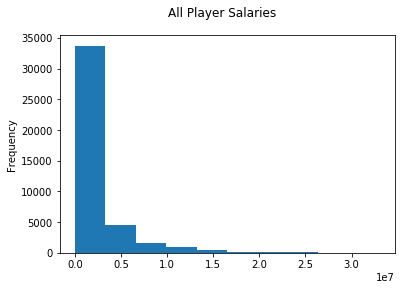

In [56]:
y.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='All Player Salaries')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120b5d390>],
      dtype=object)

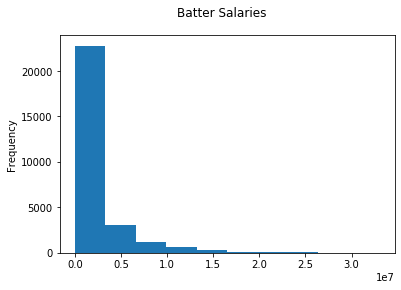

In [57]:
y_b.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Batter Salaries')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120b5d910>],
      dtype=object)

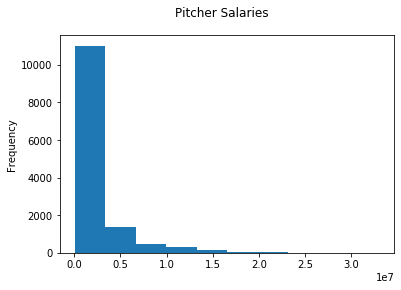

In [58]:
y_p.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Pitcher Salaries')

All player, batter, and pitcher salaries follow a near identical, right-skewed distribution. The heavy majority of MLB players make less than 1M USD per year.

### Change in average salary over time

In [85]:
all_salary = df_batting[['yearID', 'salary']].append(df_pitching[['yearID', 'salary']])

In [86]:
as_batting = df_batting.groupby(['yearID']).mean()
as_pitching = df_pitching.groupby(['yearID']).mean()
as_all = all_salary.groupby(['yearID']).mean()

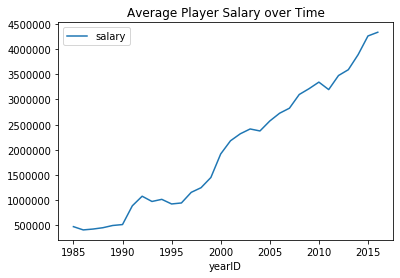

In [87]:
as_all.plot(y='salary', title='Average Player Salary over Time')

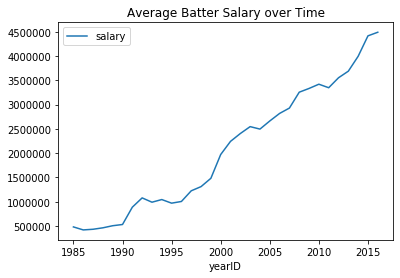

In [71]:
as_batting.plot(y='salary', title = 'Average Batter Salary over Time')

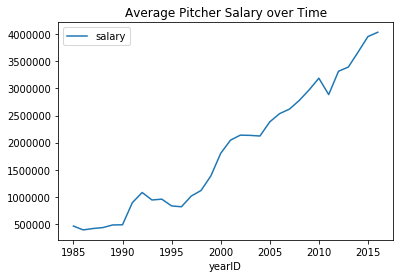

In [73]:
as_pitching.plot(y='salary', title = 'Average Pitcher Salary over Time')

Average MLB player salaries have risen from 500K USD to 4M USD from 1985 to 2016. Note that the data available does not span until present day. This means that we need to adjust our salary data to reflect present day figures.

### Distribution of salaries in any given year

In [88]:
ad_batting = df_batting.groupby(['yearID'])['salary'].describe()
ad_pitching = df_pitching.groupby(['yearID'])['salary'].describe()
ad_all = all_salary.groupby(['yearID']).describe()

In [89]:
ad_all

salary                                                          \
        count      mean       std     min     25%       50%       75%   
yearID                                                                  
1985      811   474,780   328,814  60,000 208,125   415,000   650,000   
1986    1,121   409,780   391,686  60,000  85,000   275,000   650,000   
1987      967   427,088   410,708  62,500  85,000   290,000   691,667   
1988    1,001   453,397   436,281  62,500 107,500   320,000   675,000   
1989    1,106   497,745   531,972  62,500  90,000   287,500   750,000   
1990    1,290   516,173   535,812 100,000 108,000   275,000   771,875   
1991    1,039   888,651   930,344 100,000 155,000   505,000 1,350,000   
1992    1,150 1,078,980 1,188,725 109,000 150,000   500,000 1,840,000   
1993    1,431   974,783 1,270,638       0 124,000   300,000 1,341,667   
1994    1,311 1,016,919 1,317,804 109,000 135,000   325,000 1,400,000   
1995    1,627   925,185 1,482,262 109,000 114,000   215,000   800,000   
1996    1,491   945,102 1,436,815 109,000 130,562   240,000 1,000,000   
1997    1,501 1,156,146 1,618,872 109,500 172,000   350,000 1,550,000   
1998    1,620 1,248,097 1,756,391 170,000 188,950   350,000 1,600,000   
1999    1,582 1,450,914 1,976,901 200,000 215,000   452,500 1,950,000   
2000    1,362 1,918,175 2,395,896 200,000 267,625   750,000 2,750,000   
2001    1,343 2,180,316 2,721,976 200,000 275,000 1,000,000 3,000,000   
2002    1,309 2,319,308 2,898,728 200,000 280,000 1,000,000 3,333,333   
2003    1,319 2,414,574 3,277,795 165,574 322,000   775,000 3,275,000   
2004    1,297 2,375,107 3,324,880 300,000 335,000   800,000 3,000,000   
2005    1,301 2,572,864 3,432,845 300,000 350,000   900,000 3,250,000   
2006    1,349 2,727,205 3,500,740 327,000 350,000 1,000,000 3,750,000   
2007    1,341 2,826,898 3,568,014 380,000 400,000 1,000,000 4,000,000   
2008    1,321 3,099,349 4,029,791 390,000 404,000 1,000,000 4,250,000   
2009    1,311 3,214,639 4,186,266 400,000 421,450 1,300,000 4,125,000   
2010    1,303 3,344,994 4,401,646 400,000 420,000 1,150,000 4,450,000   
2011    1,312 3,196,745 4,315,850 414,000 433,500 1,200,000 4,050,000   
2012    1,348 3,476,096 4,646,726 480,000 490,000 1,157,500 4,512,500   
2013    1,334 3,591,628 4,804,848 480,000 501,800 1,275,000 5,000,000   
2014    1,303 3,891,339 4,974,696 500,000 512,500 1,500,000 5,000,000   
2015    1,387 4,261,792 5,371,685 507,000 524,500 2,000,000 6,000,000   
2016    1,371 4,335,626 5,703,270 507,500 521,000 1,600,000 6,000,000   

                   
              max  
yearID             
1985    2,130,300  
1986    2,800,000  
1987    2,127,333  
1988    2,340,000  
1989    2,766,667  
1990    3,200,000  
1991    3,800,000  
1992    6,100,000  
1993    6,200,000  
1994    6,300,000  
1995    9,237,500  
1996    9,237,500  
1997   10,000,000  
1998   14,936,667  
1999   11,949,794  
2000   15,714,286  
2001   22,000,000  
2002   22,000,000  
2003   22,000,000  
2004   22,500,000  
2005   26,000,000  
2006   21,680,727  
2007   23,428,571  
2008   28,000,000  
2009   33,000,000  
2010   33,000,000  
2011   32,000,000  
2012   30,000,000  
2013   29,000,000  
2014   26,000,000  
2015   32,571,000  
2016   33,000,000

The upper range of MLB salaries (75+ percentile) have increased at a much higher rate than that of the longer range (50- percentile). It is worth noting that very few players have salaries in the upper range. The distribution of salaries for any given year split by batter and pitcher are given below for reference.

In [90]:
ad_batting.head()

,count,mean,std,min,25%,50%,75%,max
yearID,,,,,,,,
1985,577,"479,950","339,318","60,000","208,750","415,000","670,000","2,130,300"
1986,775,"418,065","403,581","60,000","85,000","280,000","650,000","2,800,000"
1987,673,"431,524","421,636","62,500","85,000","290,000","685,000","2,127,333"
1988,707,"461,340","450,459","62,500","110,000","310,000","697,500","2,340,000"
1989,768,"504,376","534,962","62,500","90,750","301,250","750,000","2,766,667"


In [91]:
ad_pitching.head()

,count,mean,std,min,25%,50%,75%,max
yearID,,,,,,,,
1985,234,"462,030","301,666","60,000","208,625","423,750","639,375","1,713,333"
1986,346,"391,221","363,513","60,000","80,000","270,000","633,333","1,825,000"
1987,294,"416,934","385,029","62,500","80,000","296,250","694,167","1,850,000"
1988,294,"434,296","400,226","62,500","101,375","322,500","646,250","2,070,000"
1989,338,"482,678","525,589","62,500","85,000","265,000","747,500","2,766,667"
